In [94]:
import pandas
import json
import pickle

def write_obj(obj,filename):
    with open(filename, 'wb') as handle:
        pickle.dump(obj, handle, protocol=pickle.HIGHEST_PROTOCOL)

def load_obj(filename):
    with open(filename, 'rb') as handle:
        b = pickle.load(handle)
        return b


historical = json.load(open('legislators-historical.json'))
current = json.load(open('legislators-current.json'))

#historical_p = pandas.read_json("legislators-historical.json")

In [109]:
import copy

def id_dict(json_data):
    congress_dict = {}
    for x in json_data:
        key = x["id"]["bioguide"]
        congress_dict[key] = x
    return congress_dict

def dedupe(h,c,h_dict):
    container = copy.deepcopy(h)
    for c_entry in current:
        c_bio_id = c_entry["id"]["bioguide"]
        if c_bio_id in h_dict:
            print "True"
            for a_entry in container:
                a_bio_id = a_entry["id"]["bioguide"]
                if c_bio_id == a_bio_id:
                    new_termset = merge_terms(c_entry["terms"],a_entry["terms"])
                    a_entry["terms"] = new_termset
        else:
            container.append(c_entry)
            h_dict[c_bio_id] = c_entry
    return container
                
def merge_terms(termset_1,termset_2):
    for term in termset_1:
        if term not in termset_2:
            termset_2.append(term)
    return termset_2

hist_dict = id_dict(historical)
print len(hist_dict)
hist_and_curr = dedupe(historical,current,hist_dict)
print len(hist_dict)

i=0
for x in hist_dict:
    print x
    i = i+1
    if i >10: break

11871
12411
B000917
B000916
B000915
B000914
B000913
B000912
B000911
B000910
B000919
B000918
K000336


In [110]:
print len(hist_and_curr)
print len(historical),len(current)



12411
11871 540


In [34]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

def date_from_uni(unidate):
    return datetime.strptime(unidate,"%Y-%m-%d")

unidate = historical[0]["bio"]["birthday"]


In [23]:
from collections import OrderedDict
cutoffs = OrderedDict([("early",1883),("lost",1901),("greatest",1924),("silent",1945),("boomer",1965),("x",1981)])


In [140]:
earliest = 1850
unknown_birthdates = []

def get_gen(birthdate):
    for gen in cutoffs:
        if birthdate.year < cutoffs[gen]:
            return gen
    return "milennial"

def convert_ndata(congressman):
    target = {}
    target["id"] = congressman["id"]["bioguide"]
    target["name"] = congressman["name"]
    target["gender"] = congressman["bio"]["gender"]
    if "birthday" in congressman["bio"]:
        birthday = date_from_uni(congressman["bio"]["birthday"])
    else:
        unknown_birthdates.append(congressman)
        birthday = date_from_uni(congressman["terms"][0]["start"]) - relativedelta(years=25)
    target["birthdate"] = birthday
    target["generation"] = get_gen(birthday)
    target["terms"] = congressman["terms"]
    return target

annual_data = []
unknown_party = []

def add_to_annual(congressman,i):
    data = convert_ndata(person)
    for term in person["terms"]:
        end = date_from_uni(term["end"])
        start = date_from_uni(term["start"])
        end_year = end.year
        start_year = start.year
        if end_year >= earliest:
            data["state"] = term["state"]
            if "party" not in term:
                unknown_party.append(person)
                data["party"] = "unknown"
            else:
                data["party"] = term["party"]
            data["type"] = term["type"]
            if start_year < earliest:
                start_year = earliest
            year = start_year
            while year < end_year:
                data["year"] = year
                annual_data.append(data)
                data = dict(data)
                year = year+1 
    return i
                
j=0                
for person in hist_and_curr:
    j = add_to_annual(person,j)
print j

0


In [141]:
len(unknown_party)

50

In [142]:
annualdf = pandas.DataFrame(annual_data)
#write_obj(annualdf, "annual.pickle")

In [139]:
hist_dict["A000055"]["terms"]

[{u'district': 4,
  u'end': u'1999-01-03',
  u'party': u'Republican',
  u'start': u'1997-01-07',
  u'state': u'AL',
  u'type': u'rep'},
 {u'district': 4,
  u'end': u'2001-01-03',
  u'party': u'Republican',
  u'start': u'1999-01-06',
  u'state': u'AL',
  u'type': u'rep'},
 {u'district': 4,
  u'end': u'2003-01-03',
  u'party': u'Republican',
  u'start': u'2001-01-03',
  u'state': u'AL',
  u'type': u'rep'},
 {u'district': 4,
  u'end': u'2005-01-03',
  u'party': u'Republican',
  u'start': u'2003-01-07',
  u'state': u'AL',
  u'type': u'rep',
  u'url': u'http://www.house.gov/aderholt'},
 {u'district': 4,
  u'end': u'2007-01-03',
  u'party': u'Republican',
  u'start': u'2005-01-04',
  u'state': u'AL',
  u'type': u'rep',
  u'url': u'http://www.house.gov/aderholt'},
 {u'district': 4,
  u'end': u'2009-01-03',
  u'party': u'Republican',
  u'start': u'2007-01-04',
  u'state': u'AL',
  u'type': u'rep',
  u'url': u'http://aderholt.house.gov'},
 {u'district': 4,
  u'end': u'2011-01-03',
  u'party': u

In [143]:
terms2019 = annualdf[annualdf["year"]==2019]
person_counts = pandas.DataFrame({'sum': terms2019.groupby("id").size()})

person_counts

,sum
id,
A000360,1
B000575,1
B001135,1
B001236,1
B001267,1
B001277,1
B001288,1
C000567,1
C000880,1


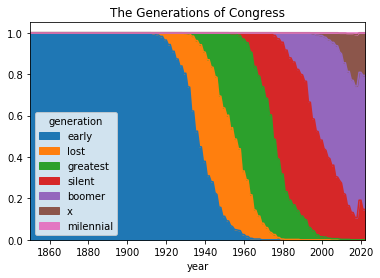

In [164]:
import matplotlib,pylab,numpy
%matplotlib inline

def count_to_percent(value,group,totals):
    s = totals.loc[group]["sum"]
    return float(value)/float(s)

def generation_summary(df,count_or_percent):
    ndf = pandas.DataFrame({'count': df.groupby(["year","generation"]).size()}).reset_index()
    totals = pandas.DataFrame({'sum': df.groupby("year").size()})
    if(count_or_percent == "percent"):
        ndf.loc[:,count_or_percent] = ndf.apply(lambda x: count_to_percent(x['count'],x['year'],totals),axis=1)
    target = ndf.pivot(index='year', columns = 'generation', values = count_or_percent)
    target=target[new_order]
    return target

generation = generation_summary(annualdf,"percent")
generation.plot(kind="area")
matplotlib.pyplot.title("The Generations of Congress")

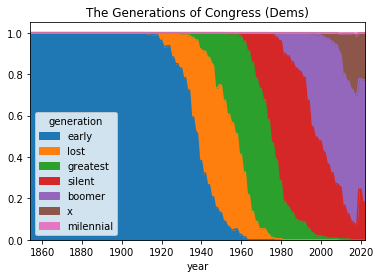

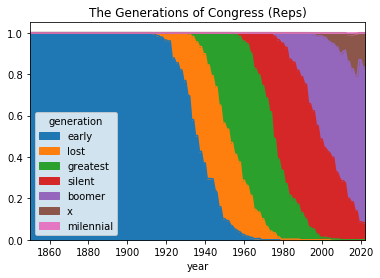

In [161]:
new_order = ['early','lost','greatest','silent','boomer','x','milennial']

rep_df = annualdf[annualdf["party"]=="Republican"]
dem_df = annualdf[annualdf["party"]=="Democrat"]

dem_gen = generation_summary(rep_df,"percent")
dem_gen.plot(kind="area")
matplotlib.pyplot.title("The Generations of Congress (Dems)")
rep_gen = generation_summary(dem_df,"percent")
rep_gen.plot(kind="area")
matplotlib.pyplot.title("The Generations of Congress (Reps)")

KeyError: "['milennial'] not in index"

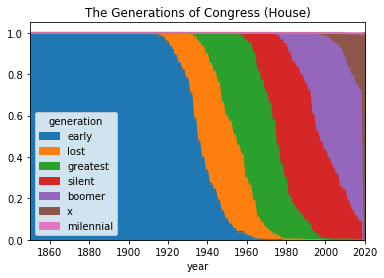

In [162]:
house_df = annualdf[annualdf["type"]=="rep"]
sen_df = annualdf[annualdf["type"]=="sen"]

house_gen = generation_summary(house_df,"percent")
house_gen.plot(kind="area")
matplotlib.pyplot.title("The Generations of Congress (House)")
sen_gen = generation_summary(sen_df,"percent")
sen_gen.plot(kind="area")
matplotlib.pyplot.title("The Generations of Congress (Senate)")

## 